The First LangGraph (Basic with 1 node)

In [ ]:
# %pip install langgraph langchain langchain-community
from typing import Dict, TypedDict
# framework to help design and manage the flow of tasks in the application using a graph
from langgraph.graph import StateGraph

In [ ]:
# Create an AgentState (Shared datastructure that keeps track of information as your application runs)
class AgentState(TypedDict):  # Our stete schema
    message: str

# Create 1st node


def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state."""
    state['message'] = "Hey " + state['message'] + ", welcome to LangGraph!"
    return state

In [ ]:
# Build a graph
graph = StateGraph(AgentState)
graph.add_node("greet", greeting_node)

# Add start and end points
graph.set_entry_point("greet")
graph.set_finish_point("greet")

# Compile the graph
app = graph.compile()

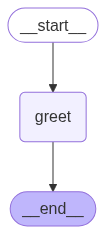

In [ ]:
# Vissualize the graph
from IPython.display import Image, display
# Render the graph as a PNG image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
# Run
results = app.invoke({"message": "David"})

results['message']

'Hey David, welcome to LangGraph!'